# Project 2, APS1070 Summer 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: June 18, 23:00 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Matthew McFee 
*   Student Number: 1005449631

##Part 1: Getting started [6 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____
* What features in the dataset are present aside from the 28 main features?  _____
* Which column contains the targets? To what do the values correspond?_____

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=55bde6814a94247768f585cdb180638c86f3098ff21384f15b2378ccd1c5ee45
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df['rows']= np.arange(0,df['V23'].values.shape[0],1)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,rows
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,284802
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,284803
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,284804
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,284805


|  Question | Answer  |
|---|---|
| How many rows are there?  | 284807  |
|  What features are present in the dataset other than the 28 main features? | Time, Amount, Class, Rows  |
| Which column corresponds to the targets, and what do the values correspond to?  | The 30th column of the dataframe, titled Class is the target column, <br /> and the values indicate either a non-fraudulent or fradulent transaction {0, 1}  |


It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____
* Is this data considered balanced or unbalanced? Why is this the case?_____
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____



In [ ]:
# Calculate the total number of each class 

num_non_fraud = sum(df["Class"] == 0)/df.shape[0]
num_fraud = sum(df["Class"] == 1)/df.shape[0]

print("The percentage of non-fraudulent transactions is", 100*num_non_fraud, "%")
print("The percentage of fraudulent transactions is", 100*num_fraud, "%")

# Calculate if the data set is balanced 

if num_non_fraud == num_fraud:
  print("The dataset is balanced.")

else: 
  print("The dataset is unbalanced.")

The percentage of non-fraudulent transactions is 99.82725143693798 %
The percentage of fraudulent transactions is 0.1727485630620034 %
The dataset is unbalanced.


| Classification | Percentage of total dataset |
|---|---|
| Non-fraudulent  | 99.82725143693798%  |
| Fraudulent  | 0.1727485630620034%  |

This dataset would be considered unbalanced. In a balanced dataset there are equal numbers of each class. Since this dataset contains mostly non-fraudulent transactions, and a small subset of fraudulent transactions, it is unbalanced.

In the case of a KNN classifier, the performance of the classifier will be impacted by the composition of the dataset. A KNN classifier would perform poorly on a very imbalanced dataset such as this. For example, one would have to ensure that during splitting of the data into training and test sets, that the training set contains some fraudulent cases. Additionally, since a KNN is dependent on Euclidean distances (or another distance metric), the nearest neighbours of a fraudulent transaction, may still be non-fraudlent cases. The KNN would only potentially work if all of the fraudelent cases are very close together in the feature space. However, if the fraudelent cases are very diverse this would be unlikely. 


Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 1.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V11? Make sure to only use your training set for this calculation. _____

Use the code below to set up a Gaussian object for V11.

In [ ]:
### Split the data  ###

X = df.iloc[:, 0:-3]
y = df.iloc[:, -2]

# print(df.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

X_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
191125,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,-0.646900,-0.282785,0.023241,-0.421092,0.368247,-0.158465,-0.334756,-0.337180,-0.842032,-0.033013,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199
153710,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,-1.221469,1.659649,-2.785047,0.373031,0.959813,-0.781750,0.471617,0.757110,1.553497,-0.480573,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814
261216,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,-0.199536,0.644008,0.509291,-0.247527,-0.614734,-0.425518,0.668894,0.064331,0.384197,0.527165,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179
190724,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,-0.277888,0.910986,0.055726,-1.178182,-0.318203,0.394330,0.489917,0.148204,1.153798,-0.083757,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441
127492,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,-0.109470,0.906279,0.705060,0.569520,0.457899,1.289436,0.327637,-0.204127,1.013530,1.765153,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114


In [ ]:
from scipy import stats

norm = stats.norm(

    loc = X_train["V11"].mean(),  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = X_train["V11"].std() ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


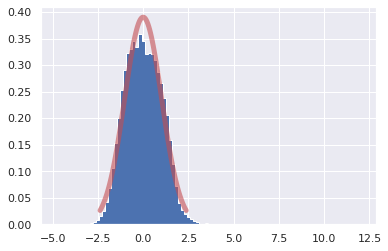

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V11'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()



We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

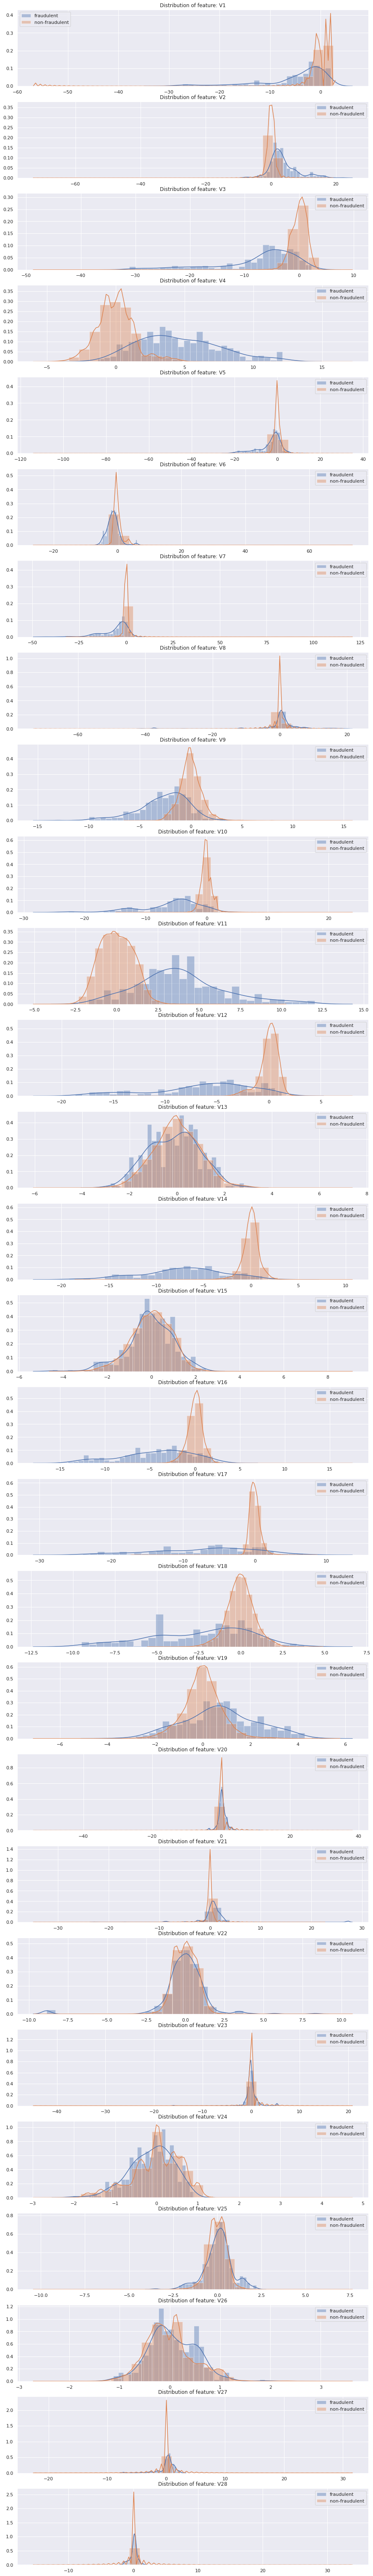

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Q.** Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[2 Marks]**

The graphs show the distributions of the feature values for fraudulent and non-fraudulent cases for each variable. This is useful when using a Gaussian distribution to detect anomalies. This is because we will find features for which the fraudulent and non-fraudlent cases have very different distributions. Thus, for a feature where the distributions of fraudulent, and non-fraudulent cases are very different, if we fit a Gaussian to the non-fraudulent data, the outlier points will be determined to be not from the non-fraudulent Gaussian distribution. This means that if we found the PDF of the Gaussian of the non-fraudulent distribution, when inputting the feature value of a fraudulent case, a low value should be obtained, indicating is is unlikely the fraudulent point is from our distribution. In short, we want a variable in which there is good class separation.

## Part 2: Single Variable Gaussian Distribution: [7 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. Let's explore the following scenarios:

1.   **One Gaussian:** First, we will fit a single gaussian distribution.

  *   Plot a ROC curve for each feature, fitting non-fraudulent transactions.
  *   Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC (Area under the ROC Curve)
  *  To make a prediction, we compute the probability that each transaction in the training set belongs to that distribution. If the probability is lower than a threshold, we consider that transaction a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. Report peformance on the test set as well.

  


2.   **Two Gaussians:** In this case, we will fit a Gaussian to each class in the selected feature above — one gaussian to the feature of non-fraudulent transactions and one gaussian for fraudulent transactions. To make predictions, we use the probability of a transaction belonging to the fraudulent Gaussian distribution and non-fraudulent distribution. 

  * Build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.

Summarize your findings.


In [ ]:
X_filt = X_train[y_train == 0]

X_filt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
191125,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,-0.646900,-0.282785,0.023241,-0.421092,0.368247,-0.158465,-0.334756,-0.337180,-0.842032,-0.033013,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199
153710,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,-1.221469,1.659649,-2.785047,0.373031,0.959813,-0.781750,0.471617,0.757110,1.553497,-0.480573,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814
261216,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,-0.199536,0.644008,0.509291,-0.247527,-0.614734,-0.425518,0.668894,0.064331,0.384197,0.527165,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179
190724,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,-0.277888,0.910986,0.055726,-1.178182,-0.318203,0.394330,0.489917,0.148204,1.153798,-0.083757,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441
127492,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,-0.109470,0.906279,0.705060,0.569520,0.457899,1.289436,0.327637,-0.204127,1.013530,1.765153,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114


[-1.58079605 -1.57556018 -2.14521868 ... -1.75567925 -1.98604624
 -1.6443053 ]
[-1.41868882 -1.61600558 -1.41158835 ... -1.95306281 -1.50025468
 -1.45719433]
[-1.53532721 -1.32164865 -2.14953251 ... -1.91669411 -1.29764446
 -2.93008401]
[-1.8991707  -1.300592   -1.26543921 ... -3.07086226 -1.30750721
 -1.54921476]
[-3.97077392 -1.45318145 -1.34720446 ... -1.22525132 -1.35115919
 -1.35420658]
[-4.37070032 -1.38117339 -1.2300525  ... -1.21654404 -1.24837124
 -1.59862494]
[-1.11339672 -1.31646952 -1.08687347 ... -1.09952185 -1.32742198
 -1.09506769]
[-1.3671666  -1.08092821 -1.0702741  ... -1.19870247 -1.08521546
 -1.07187085]
[-1.05061105 -1.58508591 -1.04571892 ... -1.60041328 -1.31408637
 -1.65936733]
[-1.16084012 -1.6570966  -0.98355669 ... -1.07373183 -0.96740726
 -1.02879282]
[-0.96049392 -2.30056584 -1.13269649 ... -0.99773312 -1.47778799
 -1.54079023]
[-0.86237022 -5.24593956 -1.00028961 ... -0.87361128 -2.35077115
 -1.23493557]
[-1.00282723 -0.9830324  -0.94398482 ... -0.95697047

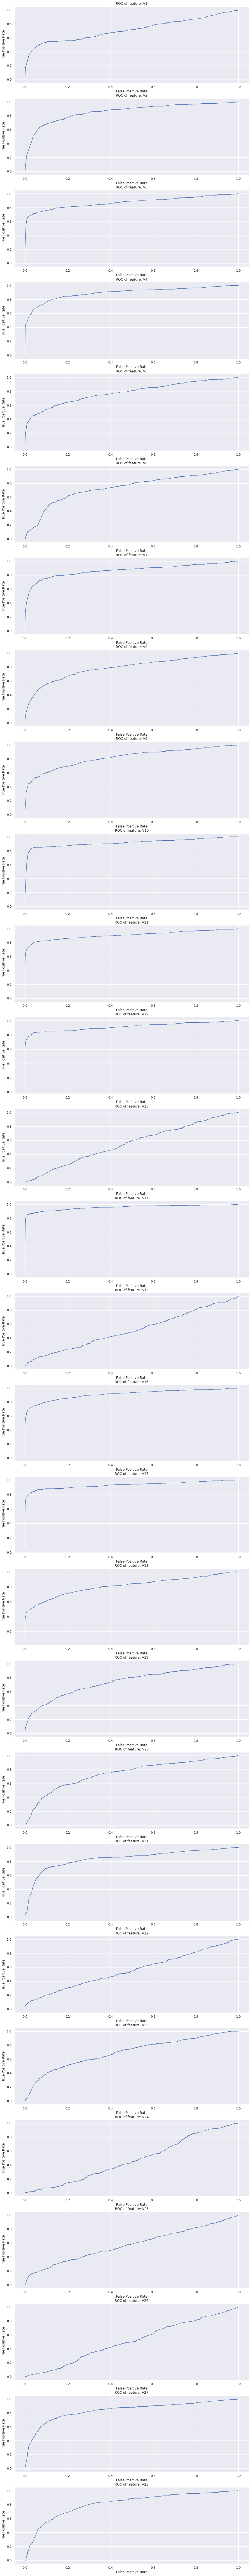

In [ ]:
# One Gaussian 

# Import libraries

from sklearn.metrics import roc_curve 
from sklearn.mixture import GaussianMixture
import numpy as np

def find_gauss_params(data):
  mu = data.mean()
  sigma2 = data.std()

  return mu, sigma2

# Plot an ROC curve for each feature 

# Using the previous figure setup code and adjusting it to produce ROC instead
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,6*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])

    # Find the Gaussian parameters

    # This code would be for manual computation of the Gaussian PDF
    # but I am going to use GaussianMixture from sklearn instead 
    # mu, sigma2 = find_gauss_params(X_filt[feat])
    # sigma = np.sqrt(sigma2)
    # exponent = (-1/2)*(((X_train[feat].values - mu)/sigma)**2)
    # p = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(exponent)

    # print(p)

    # Use the GaussianMixture function with n=1 for 1 Gaussian distribution.
    # I also set the random state to assure reproducibility 

    gm = GaussianMixture(n_components=1, random_state=1)
    gm.fit(X_filt[feat].values.reshape(-1,1))

    # Predict the weighted log probabilities of each data point
    y_pred = gm.score_samples(X_train[feat].values.reshape(-1,1))

    print(y_pred)
    
    # Find the ROC curve using sklearn, with y_pred being the weighted log
    # probabilities of each data point in the training set, and the positive
    # class being the fraudulent cases

    fpr, tpr, thresholds = roc_curve(y_train, 1 - y_pred, 
                                       drop_intermediate=True)
    # fpr, tpr, thresholds = roc_curve(y_train, -1*y_pred, drop_intermediate=True)
    # fpr, tpr, thesholds = roc_curve(y_train, y_pred)

    # Plot ROC curves 
    sns.lineplot(fpr, tpr)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC of feature: ' + feat)
    

In [ ]:
# Fine the highest AUC feature based on the above results 

from sklearn.metrics import roc_auc_score

def find_auc_scores(X_train, y_train, trained_model, features):
  scores = []
  for i, feat in enumerate(features):
    y_pred = trained_model.score_samples(X_train[feat].values.reshape(-1,1))
    # Multiple y_pred by -1 to flip the sign of probabilities so the larger
    # the number the greater the probability the transaction is fraudulent.
    # Otherwise the ROCs are inverted.
    score = roc_auc_score(y_train, 1-y_pred)
    scores.append(score)
  return scores

auc_scores = find_auc_scores(X_train, y_train, gm, features)

max_auc_score_index = auc_scores.index(max(auc_scores))

max_auc_feature = features[max_auc_score_index]

print("The feature with the largest AUC is", max_auc_feature)


The feature with the largest AUC is V14


In [ ]:
# Find the the threshold that optimizes the F1 score with feature V14
from sklearn.metrics import f1_score

gm = GaussianMixture(n_components=1, random_state=1, covariance_type="full")
gm.fit(X_filt['V14'].values.reshape(-1,1))
y_pred = gm.score_samples(X_train['V14'].values.reshape(-1,1))
fpr, tpr, thresholds = roc_curve(y_train, 1 - y_pred, 
                                       drop_intermediate=True)

print(y_pred)
print(len(y_pred))

[-0.88969041 -1.36985479 -1.05346567 ... -1.47870999 -0.87274366
 -2.29011688]
199364


In [ ]:
f1_scores_train = []

for threshold in thresholds[1:]:

  #for i in range(0, len(y_pred)):
  #  if -1*y_pred[i] >= threshold:
  #    y_pred[i] = 1
  #  else: 
  #    y_pred[i] = 0

  y_pred_new = 1 - y_pred

  y_pred_new = y_pred_new >= threshold

  f1_score_thresh = f1_score(y_train, y_pred_new, pos_label=1, average='binary')
  f1_scores_train.append(f1_score_thresh)

f1_score_max_index = f1_scores_train.index(max(f1_scores_train))


In [ ]:
print("The max F1 obtained for the training set is ", max(f1_scores_train))

best_thresh = thresholds[f1_score_max_index]

print("The best threshold value is ", best_thresh)

y_test_pred = gm.score_samples(X_test['V14'].values.reshape(-1,1))

y_test_pred = 1 - y_test_pred

y_test_classified = y_test_pred >= best_thresh

f1_score_test = f1_score(y_test, y_test_classified)

print("The F1 score for the test set is ", f1_score_test)

The max F1 obtained for the training set is  0.6226685796269726
The best threshold value is  23.184520051265153
The F1 score for the test set is  0.5873015873015872


**Summary of One Gaussian Model**

|              | F1 Score |
|--------------|----------|
| Training set |    0.6226685796269726      |
| Test Set     |    0.5873015873015872      | 

V14 was used to construct this model as it had the highest AUC and the optimum threshold was 23.184520051265153.


In [ ]:
# Two Gaussians

# Generate and fit the gaussian mixture of 2 components (a Gaussian for 
# fraudulent and non-fraudulent transactions)

gm2 = GaussianMixture(n_components=2, covariance_type = 'full', random_state=1)

# Use the whole set since we want to fit two Gaussians, one to each category
# and thus we also need the fraudulent data point's information
gm2.fit(X_train['V14'].values.reshape(-1,1))

print(gm2.means_)
print(gm2.covariances_)

# Check the F1 score for the training data set

y_train_pred = gm2.predict(X_train['V14'].values.reshape(-1,1))

f1_score_train2 = f1_score(y_train, y_train_pred, pos_label=1, average='binary')

if gm2.means_[0,0] > gm2.means_[1,0]: 
     print("Class 1 is the fraudulent class")
else:
     print("Class 0 is the fraudulent class")

print("The F1 score for the training set using 2 Gaussians is ",
      f1_score_train2)

# We will use the predict method to assign the labels to the test set

y_test_pred = gm2.predict(X_test['V14'].values.reshape(-1,1))

# Find the test set F1 score and see how much better 2 Gaussians performed

f1_score_test_2 = f1_score(y_test, y_test_pred, pos_label=1, average='binary')

print("The F1 score for the test set using 2 Gaussians is ", 
      f1_score_test_2)

from sklearn.metrics import accuracy_score

# Accuracies
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

# Check the precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

ps = precision_score(y_test, y_test_pred)
print("The precision score is ", ps)

rs = recall_score(y_test, y_test_pred)
print("The recall score is ", rs)

[[ 0.07203719]
 [-0.2198837 ]]
[[[0.32791497]]

 [[2.62558444]]]
Class 1 is the fraudulent class
The F1 score for the training set using 2 Gaussians is  0.02496255616575137
The F1 score for the test set using 2 Gaussians is  0.02065103255162758
0.8726500270861339
0.8690120899312992
The precision score is  0.010448950677410786
The recall score is  0.8740740740740741


These results suggest that a large number of non-fraudulent cases are being classified as being fraudulent when using a 2 Gaussian mixture. This will not work well because it is generating one distribution that is the summation of two components. This does not work well since we are fitting two Gaussians and taking their sum as the PDF of our random variable. It cannot be guaranteed that each Gaussian represents one of the two classes of interest. The only way to assure this is to fit two Gaussians separately on each class using GaussianMixture() with n_components = 1 and then comparing the outputs of score_samples. I will do this now.I should fit two Gaussian's separately to guarantee we have two classes. 

In [ ]:
# Fit the non-fraudulent data points

gm1 = GaussianMixture(n_components=1, random_state=1)

X_train_1 = X_train['V14']
X_train_1 = X_train_1[y_train == 0]

gm1.fit(X_train_1.values.reshape(-1,1))
p_non_fraud = gm1.score_samples(X_train['V14'].values.reshape(-1,1))

# Fit the fraudulent data points to a Gaussian

gm2 = GaussianMixture(n_components=1, random_state=1)

X_train_2 = X_train['V14']
X_train_2 = X_train_2[y_train == 1]

gm2.fit(X_train_2.values.reshape(-1,1))
p_fraud = gm2.score_samples(X_train['V14'].values.reshape(-1,1))

classified = p_fraud > p_non_fraud

print(classified)

# Get the F1 score using 2 Gaussians

f1_2_gauss = f1_score(y_train, classified, pos_label=1)

print("The F1 score using 2 Gaussians is: ", f1_2_gauss)

ps = precision_score(y_train, classified)
rs = recall_score(y_train, classified)

print("The precision is: ", ps)
print("The recall is: ", rs)

print(gm1.means_)
print(gm1.covariances_)
print(gm2.means_)
print(gm2.covariances_)

[False False False ... False False False]
The F1 score using 2 Gaussians is:  0.09586929716399507
The precision is:  0.05072581960528462
The recall is:  0.8711484593837535
[[0.01083488]]
[[[0.80474102]]]
[[-7.08581295]]
[[[18.11778814]]]


Similarly, I am getting a low F1 score, a low precision, and a very high recall. This again suggests that a large number of non-fraudulent data points are being flagged as faudulent. This will increase the denominator of the recall formula (tp + fp). These false positives won't negatively impact the recall much as it is tp/(tp + fn). This also suggests there are very few false negatives. This model may still be useable as it is likely much better for a bank to be generating false positives (a human could easily verify each flagged fraudulent transaction) vs. missing a real fraudulent transaction via a false negative.

**Summary of Two Gaussian Model**

|              | F1 Score |
|--------------|----------|
| Training set |    0.09586929716399507    |
| Test Set     |    0.05072581960528462  | 

V14 was used to construct this model as it had the highest AUC. Again the precision was very low and the recall was very high, indicating that the model is classifying non-fraudulent transactions as fraudulent, and driving down precision. This could be due to only using a single feature, and the distributions not being fully resolved, as seen in the graphs above.

## Part 3: Multivariate and Mixture of Gaussian Distribution [7 Marks]
We want to build an outlier detection model that boosts our F1 score compared to the last part. To design your model, you can benefit from:

*   Any number of features you want (multivariate).
*   You can fit your Gaussians only on non-fraudulent transactions or to both classes.
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).

It is up to you how to design your model. Try at least 5 different models and report the F1 score for each one. If your model requires a threshold to classify transactions, draw a ROC curve for each model, and compare them with part 2.1. Try to maximize your F1 score. What kind of model works better? How many features? Which features? How many Gaussians? How many components? Summarize your findings with tables and plots. 


**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


First, I am going to try building models only to the non-fraudulent data, and then classifying fraudulent transactions as those determined outliers to the non-fraudulent Gaussian clusters. I will try various numbers of clusters on the features 

In [ ]:
# First, I will try building a model that only fits to non-fraudulent data as 
# fitting gaussians to both in Part 2 seemed to produce a very low F1 score
# for pos_label 1. A lot of non-fraudulent charges were being called fraudulent
# making the model have a very low precision. 

# Using the information from the ROC curves above, many features appear to not
# be very valuable in classification of fraud vs non-fraudulent

# I'll select the features with the 5 top AUC scores
# Reference: https://stackoverflow.com/questions/12787650/finding-the-index-of-n-biggest-elements-in-python-array-list-efficiently

# np.argsort, returns the indices of the values that would sort an array
# eg. list = [3, 1, 2], indx = np.argsort(list), indx = [1, 2, 0]
# [::-1] is step size 1 from the right and [:num_values] specifies only take
# the specified number of largest values
def top_features_index(list, num_values): 
  return np.argsort(list)[::-1][:num_values]

top_features_index_ = top_features_index(auc_scores, 5)

print(list(top_features_index_)) # This means V10, V12, V14, V16, V17

# Select just these features from the training set. My results from the above
# code agree with what I see in the ROC curves.

X_train = X_train[["V10", "V12", "V14", "V16", "V17"]]
X_test = X_test[["V10", "V12", "V14", "V16", "V17"]]

# Build model on non-fraudulent data only

X_train_filt = X_train[y_train == 0]


[13, 16, 9, 11, 15]


In [ ]:
def test_thresholds(thresholds, y_true, y_pred):

  f1_scores_ = []

  for threshold in thresholds:

    y_pred_new = 1 - y_pred
    y_pred_new = y_pred_new >= threshold
    f1_score_thresh = f1_score(y_true, y_pred_new, pos_label=1, 
                               average='binary')
    f1_scores_.append(f1_score_thresh)

  f1_score_max_index = f1_scores_.index(max(f1_scores_))
  
  return f1_score_max_index

def get_f1_score(X, y, best_thresh, model):

  y_pred = model.score_samples(X.values)

  y_pred_new = 1 - y_pred
  y_pred_new = y_pred_new >= best_thresh

  f1_score_ = f1_score(y, y_pred_new)
  return f1_score_


In [ ]:
def get_model_performance(X_train_filt, X_train, y_train, X_test, y_test, model,
                          num_gauss):
  
  model.fit(X_train_filt.values)
  y_pred_train = model.score_samples(X_train.values)
  
  fpr, tpr, thesholds = roc_curve(y_train, 1 - y_pred_train, pos_label=1,
                                  drop_intermediate=True)
  
  # Generate the ROC curve
  plt.figure()
  ax = sns.lineplot(fpr, tpr)
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC of Gaussian Mixture: ' + str(num_gauss) + ' Components')

  # Find the best threshold
  best_thresh_index = test_thresholds(thresholds, y_train, y_pred_train)

  best_thresh = thresholds[best_thresh_index]

  # Get the F1 score with pos_label=1

  f1_score_test_ = get_f1_score(X_test, y_test, best_thresh, model)

  return f1_score_test_

The resultant F1 score for n = 2 is  0.7114624505928854


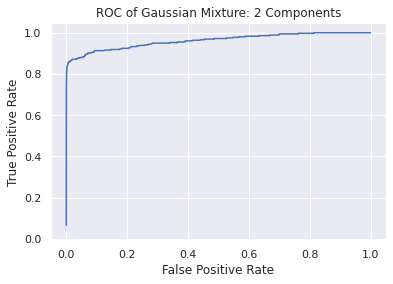

In [ ]:
# Test the above functions with n=2

model = GaussianMixture(n_components=2, random_state=1)

result = get_model_performance(X_train_filt, X_train, y_train, X_test,
                               y_test, model, 2)

print("The resultant F1 score for n = 2 is ", result)

In [ ]:
# Function to try a range of cluster numbers to see which might be best.
# I must also acknowledge that the EM algorithm may only reach a local
# optimum and not a global one. Something I can address later for fun. 

def check_cluster_performance(min_clust, max_clust):

  f1_scores_cluster_ = []

  for num in range(min_clust, max_clust + 1):

    model = GaussianMixture(n_components=num, random_state=1)
    result = get_model_performance(X_train_filt, X_train, y_train, X_test,
                               y_test, model, num)
    
    print("The resultant F1 score for n = " + str(num) + " is: ", result)
    f1_scores_cluster_.append(result)

  return f1_scores_cluster_

The resultant F1 score for n = 1 is:  0.7244094488188976
The resultant F1 score for n = 2 is:  0.7114624505928854
The resultant F1 score for n = 3 is:  0.6718146718146719
The resultant F1 score for n = 4 is:  0.6765799256505576
The resultant F1 score for n = 5 is:  0.6594982078853046
The resultant F1 score for n = 6 is:  0.6713780918727915
The resultant F1 score for n = 7 is:  0.6689655172413794
The resultant F1 score for n = 8 is:  0.6712802768166091
The resultant F1 score for n = 9 is:  0.6690647482014389
The resultant F1 score for n = 10 is:  0.636986301369863


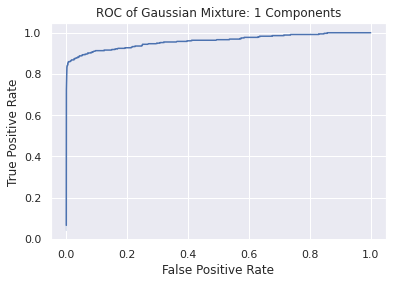

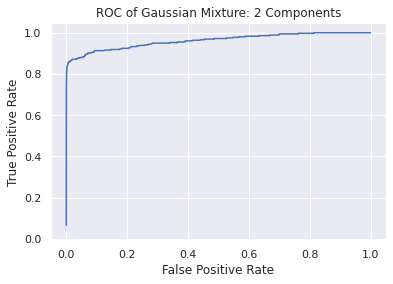

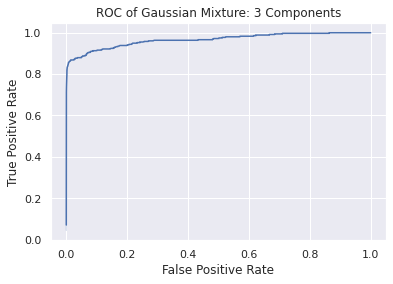

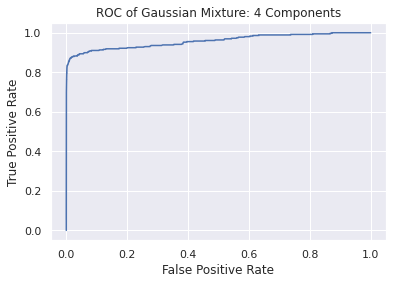

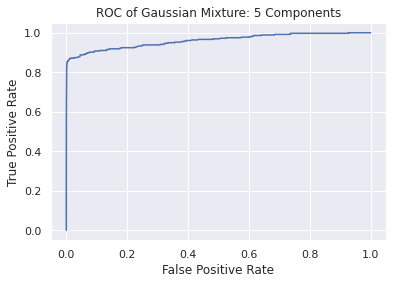

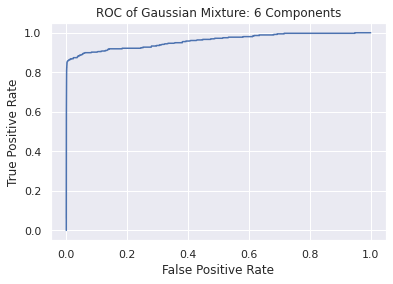

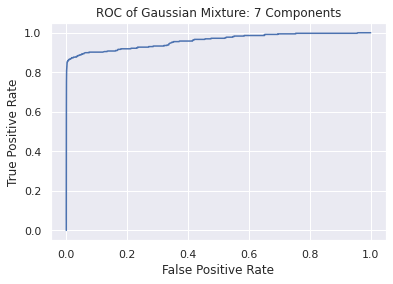

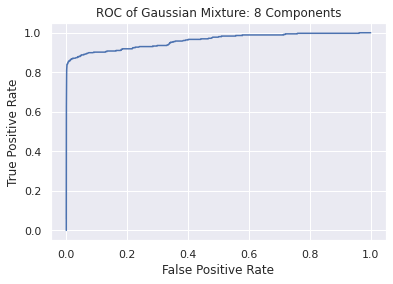

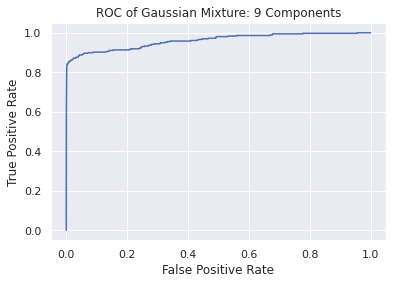

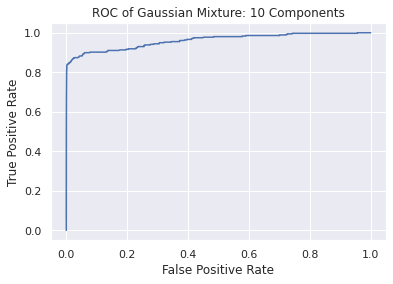

In [ ]:
f1_scores_cluster_ = check_cluster_performance(1, 10)

Text(0.5, 1.0, 'F1 Score vs # of Components')

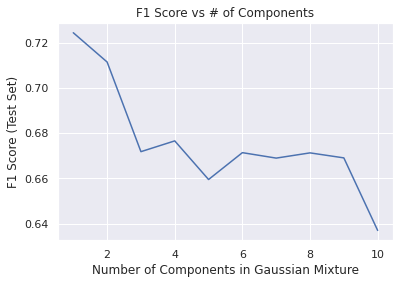

In [ ]:
# Plot the F1 scores obtained 

f1_plt = sns.lineplot(range(1,11), f1_scores_cluster_)
f1_plt.set_xlabel("Number of Components in Gaussian Mixture")
f1_plt.set_ylabel("F1 Score (Test Set)")
f1_plt.set_title("F1 Score vs # of Components")

I can see from these results that there seems to be a sharp decrease when including more than 2 components in the Gaussian mixture model. After 2 components, additional components seem to do little to improve the F1 score. The sharp drop in F1 score at 10 components may suggest that having too many Gaussian components will decrease model performance in regards to the F1 score metric. The ROC curves look very similar to the curve obtained for V14 in part 2.1. Next, I'm going to play around with the number of components being included in the model to see if only including 5 components eliminated useful information. ROC curves are almost identical for each # of clusters indicating near identical model performance when at least 2 clusters are being fit.

In [ ]:
def add_features(X_train, y_train, X_test,
                 y_test, model, features,
                 num_feat):
  
  features=[f for f in df.columns if 'V' in f]
  f1_add_feat_train = []
  f1_add_feat_test = []
  features = np.array(features)

  X = df.iloc[:, 0:-3]
  y = df.iloc[:, -2]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

  for i in range(2, num_feat + 1):

    top_features_index_ = top_features_index(auc_scores, i)
    top_features_index_ = np.ndarray.tolist(top_features_index_)

    features_selected = features[top_features_index_]
    features_selected = np.ndarray.tolist(features_selected)

    X_train_filt = X_train[features_selected]

    X_train_filt.head()

    X_train_filt_non_fraud = X_train_filt[y_train == 0]

    model.fit(X_train_filt_non_fraud.values)

    y_pred_train = model.score_samples(X_train_filt.values)

    best_thresh_index = test_thresholds(thresholds, y_train, y_pred_train)

    best_thresh = thresholds[best_thresh_index]

    f1_score_train_feat = get_f1_score(X_train_filt, y_train, best_thresh, 
                                       model)

    f1_add_feat_train.append(f1_score_train_feat)

    f1_score_test_feat = get_f1_score(X_test[features_selected], y_test,
                                      best_thresh, model)
    f1_add_feat_test.append(f1_score_test_feat)

  return f1_add_feat_train, f1_add_feat_test

In [ ]:
model = GaussianMixture(n_components = 1, random_state=1)

f1_add_feat_train, f1_add_feat_test = add_features(X_train, y_train, X_test,
                                                   y_test, model, features, 10)

9


Text(0.5, 1.0, 'Test F1 Score (Gaussian Mixture with n=1) vs. \n Number of Top Features Used')

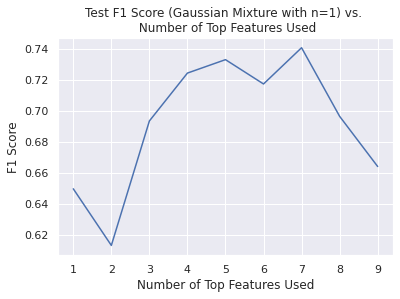

In [ ]:
# Graph the results

print(len(f1_add_feat_test))

num_features = range(1, 10)

ax2 = sns.lineplot(num_features, f1_add_feat_test)
ax2.set_xlabel('Number of Top Features Used')
ax2.set_ylabel('F1 Score')
ax2.set_title('Test F1 Score (Gaussian Mixture with n=1) vs. \n Number of Top Features Used')

The above results show the model sensitivity when adding features. It appears that for this case (n=1 Gaussian components) the peak performance is obtained when 7 top features are used. This means the features with the top 7 AUC as determined using sklearn, are used for model training. However, adding too many features for training appears to reduce model performance on the test set. 

Finally, I will try to fit Gaussians to both the fraudulent and non-fraudulent cases again to see if there is any change in performance. In this case there may be multiple Gaussians for each class label.

In [ ]:
# Prep work to make sure everything is the original unmodified values

features=[f for f in df.columns if 'V' in f]
features = np.array(features)

top_features_index_ = top_features_index(auc_scores, 7)
top_features_index_ = np.ndarray.tolist(top_features_index_)

features_selected = features[top_features_index_]
features_selected = np.ndarray.tolist(features_selected)

X = df.iloc[:, 0:-3]
y = df.iloc[:, -2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

In [ ]:
f1_scores_test = []

for i in range(1, 11):

  model_nonfraud = GaussianMixture(n_components = i, random_state = 1)
  X_train_nonfraud = X_train[features_selected]
  X_train_nonfraud = X_train_nonfraud[y_train == 0]
  model_nonfraud.fit(X_train_nonfraud.values)

  p_nonfraud = model_nonfraud.score_samples(X_test[features_selected].values)

  model_fraud = GaussianMixture(n_components = i, random_state = 1)
  X_train_fraud = X_train[features_selected]
  x_train_fraud = X_train_fraud[y_train == 1]
  model_fraud.fit(X_train_fraud.values)

  p_fraud = model_fraud.score_samples(X_test[features_selected].values)

  classified = p_fraud > p_nonfraud

  f1_score_ = f1_score(y_test, classified, pos_label=1)

  f1_scores_test.append(f1_score_)

10


Text(0.5, 1.0, 'Test F1 Score (Fraudulent and Non-fradulent Fitted)')

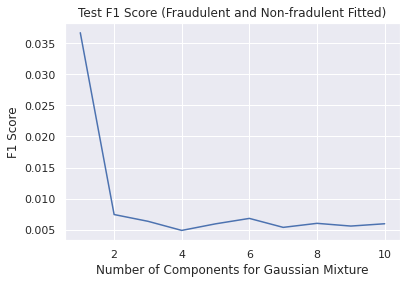

In [ ]:
print(len(f1_scores_test))

ax = sns.lineplot(range(1, 11), f1_scores_test)
ax.set_xlabel('Number of Components for Gaussian Mixture')
ax.set_ylabel('F1 Score')
ax.set_title('Test F1 Score (Fraudulent and Non-fradulent Fitted)')

Again, I can see that fitting Gaussian mixtures to both of the fraudulent and non-fraudulent cases did not do a very good job in terms of F1 score. 


In [ ]:
# Final model that works well based on my findings

features=[f for f in df.columns if 'V' in f]
features = np.array(features)

top_features_index_ = top_features_index(auc_scores, 7)
top_features_index_ = np.ndarray.tolist(top_features_index_)

features_selected = features[top_features_index_]
features_selected = np.ndarray.tolist(features_selected)

X = df.iloc[:, 0:-3]
y = df.iloc[:, -2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

# Fit the model on the non-fraudulent cases using 1 Gaussian component, and 
# 7 top features

f_model = GaussianMixture(n_components=1, random_state=1)

f_model.fit(X_train[features_selected][y_train == 0].values)

# Select the  best threshold
y_pred = f_model.score_samples(X_train[features_selected].values)

fpr, tpr, thresholds = roc_curve(y_train, 1 - y_pred, pos_label=1)

best_thresh = test_thresholds(thresholds, y_train, y_pred)

y_test_pred = f_model.score_samples(X_test[features_selected].values)

y_classified = 1 - y_test_pred
y_classified = y_classified >= best_thresh

f_f1_score = f1_score(y_test, y_classified, pos_label=1)

print('The F1 score is: ', f_f1_score)


The F1 score is:  0.7529411764705882


Text(0.5, 1.0, 'ROC Curve: n=1, 7 features, \n fitting to non-fraudulent only')

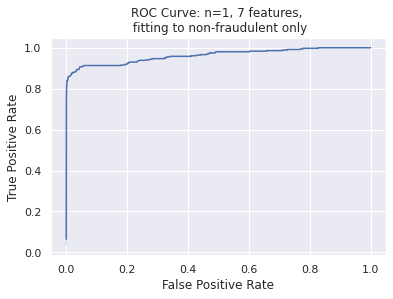

In [ ]:
# Generate the ROC curve for the above model 

ax = sns.lineplot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve: n=1, 7 features, \n fitting to non-fraudulent only')

In [ ]:
pr = precision_score(y_test, y_classified)
rc = recall_score(y_test, y_classified)
f_auc = roc_auc_score(y_test, 1 - y_test_pred)
f_acc = accuracy_score(y_test, y_classified)

print(pr)
print(rc)
print(f_auc)
print(f_acc)

0.7313432835820896
0.725925925925926
0.9645281845825757
0.9991456292499094


This model fitting only the non-fraudulent data to 1 Gaussian with features that produced the top 7 AUC in part 2 achieved a ~0.75 F1 score. The ROC curve for this model is close to the top left corner of the axes indicating a good model performance. The model is summarized as follows.

| Performance Metric  | Value  |
|---|---|
| F1 score  |  0.7529411764705882 | 
| AUC| 0.9645281845825757|
| Precision | 0.7313432835820896|
| Recall |0.725925925925926 | 
| Accuracy |0.9991456292499094 | 

As it can be seen, the model performs very well in terms of all metrics. The precision and recall appear to strike a good balance, especially in comparison to fitting mixtures to both the fraudulent and non-fraudulent data.


In [ ]:
# Assessing model sensitivity to random state 

f1_score_random_state_ = []

for i in range(1, 6):

  model = GaussianMixture(n_components=2, random_state=i)

  X_train_ = X_train[features_selected]
  x_train_ = X_train_[y_train == 0]

  model.fit(X_train_.values)

  y_pred = model.score_samples(X_train[features_selected].values)

  fpr, tpr, thresholds = roc_curve(y_train, 1 - y_pred, pos_label=1)

  best_thresh = test_thresholds(thresholds, y_train, y_pred)

  y_test_pred = f_model.score_samples(X_test[features_selected].values)

  y_classified = 1 - y_test_pred
  y_classified = y_classified >= best_thresh

  f1_score_sens = f1_score(y_test, y_classified, pos_label=1)

  f1_score_random_state_.append(f1_score_sens)


Text(0.5, 1.0, 'Model sensitivity to random state initialization')

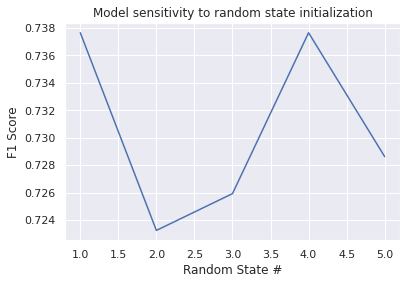

In [ ]:
# Plot the results of the above computation 

ax = sns.lineplot(range(1, 6), f1_score_random_state_)
ax.set_xlabel('Random State #')
ax.set_ylabel('F1 Score')
ax.set_title('Model sensitivity to random state initialization')

Gaussian mixtures appear to have some degree of sensitivity to random state initilization. 